In [1]:
#!nvidia-smi

In [ ]:
pwd

In [2]:
from data.my_transforms import SquareDataTransform, NoTransform, transforms
from common.utils import to_cplx, tensor_to_complex_np
import numpy as np
import torch
from tqdm import tqdm
import h5py
from matplotlib import pyplot as plt

In [5]:
from pathlib import Path
from collections import namedtuple

In [6]:
args = {'center_fractions':[0.08],'accelerations':[4],'challenge':'multicoil',
       'data_path':Path('/media/student1/NewVolume/MR_Reconstruction/datasets/fastmri/'),
       'resolution':320,
       'sample_rate':0.02,
       'batch_size':1,
        'device':'cuda',
        'data_parallel':False,
        'residual':False,
        'dcblock':False,
        'in_chans':1,
        'out_chans':1,
        'num_chans':32,
        'report_interval': 100,
        'num_epochs':20,
        'num_pool_layers':4,
        'report_interval':100,
        'drop_prob':0
       }
# d_named = namedtuple("Employee", d.keys())(*d.values())

argsobj = namedtuple('args',args.keys())(*args.values())

# data_loaders

In [5]:
# from models.dautomap.train_dautomap import create_data_loaders, build_model, build_dautomap
# train_loader, dev_loader = create_data_loaders(argsobj)
# len(train_loader)


In [ ]:
# dautomap model
from models.dautomap.train_domaintransform import create_data_loaders, build_model, build_dautomap
train_loader, dev_loader, dispay_loader = create_data_loaders(argsobj)
len(train_loader)

In [27]:
train_loader.dataset.transform.c3object.c3m.shape

torch.Size([320, 320, 2])

In [ ]:
# unet model
from models.unet.train_unet import create_data_loaders, build_model
train_loader, dev_loader, dispay_loader = create_data_loaders(argsobj)
len(train_loader)

In [18]:
for ksp,ksp_zf,img_stack , inp, tgt in (train_loader):
    print("ksp",ksp.shape,ksp.dtype)
    print("img_stack",img_stack.shape)
    break

us_imag_sq_abs torch.Size([15, 320, 320, 2])
us_imag_sq_abs torch.Size([15, 320, 320, 2])
us_imag_sq_abs torch.Size([15, 320, 320, 2])
us_imag_sq_abs torch.Size([15, 320, 320, 2])
us_imag_sq_abs torch.Size([15, 320, 320, 2])
us_imag_sq_abs torch.Size([15, 320, 320, 2])
us_imag_sq_abs torch.Size([15, 320, 320, 2])
us_imag_sq_abs torch.Size([15, 320, 320, 2])
us_imag_sq_abs torch.Size([15, 320, 320, 2])
us_imag_sq_abs torch.Size([15, 320, 320, 2])
us_imag_sq_abs torch.Size([15, 320, 320, 2])
us_imag_sq_abs torch.Size([15, 320, 320, 2])
ksp torch.Size([1, 30, 320, 320]) torch.float32
img_stack torch.Size([1, 30, 320, 320])


In [19]:
ksp.shape

torch.Size([1, 30, 320, 320])

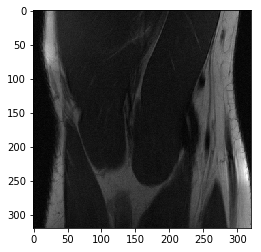

In [20]:
plt.imshow(tgt.squeeze(0),cmap='gray')

In [24]:
ksp_check.shape

torch.Size([320, 320, 2])

torch.Size([320, 320, 2])
torch.Size([320, 320, 2])


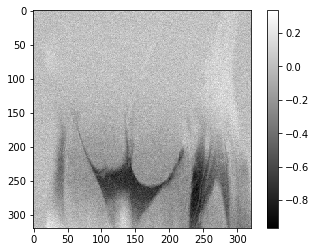

In [55]:
#checking the kspace
# kspace is stacked as : Real,Imag,Real,Imag.....
imgid=8
real=2*imgid
imag=real+1
# ksp_check =[]
ksp_check = torch.stack((ksp[0,real,:,:],ksp[0,imag,:,:]),dim=2)
print(ksp_check.shape)

ksp_check_npy = ksp_check[:,:,0].numpy()+1j*ksp_check[:,:,1].numpy()

# img_check = torch.ifft(ksp_check,2,normalized=True)
# img_check = transforms.ifft2(ksp_check)
img_check = torch.ifft(transforms.ifftshift(ksp_check,dim=(-3,-2)),2,normalized=True)

ksp_shift = transforms.ifftshift(ksp_check,dim=(-3,-2))
ksp_shift_npy = ksp_shift[:,:,0].numpy()+1j*ksp_shift[:,:,1].numpy()
print(img_check.shape)
img_check_npy =img_check[:,:,0].numpy()+1j*img_check[:,:,1].numpy()
img_check_npy.shape
plt.imshow(np.real(img_check_npy),cmap='gray')
plt.colorbar()

In [49]:
ksp_shifted_mc = transforms.ifftshift(ksp,dim=(-2,-1))

In [50]:
ksp_shifted_mc.shape

torch.Size([1, 30, 320, 320])

torch.Size([320, 320, 2])
torch.Size([320, 320, 2])


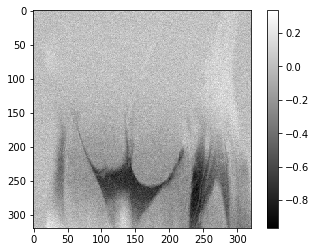

In [60]:
#checking the kspace
# kspace is stacked as : Real,Imag,Real,Imag.....
imgid=8
real=2*imgid
imag=real+1
# ksp_check =[]
ksp_check = torch.stack((ksp_shifted_mc[0,real,:,:],ksp_shifted_mc[0,imag,:,:]),dim=2)
print(ksp_check.shape)

ksp_check_npy = ksp_check[:,:,0].numpy() + 1j*ksp_check[:,:,1].numpy()

img_check = torch.ifft(ksp_check,2,normalized=True)
# img_check = transforms.ifft2(ksp_check)
# img_check = torch.ifft(transforms.ifftshift(ksp_check,dim=(-3,-2)),2,normalized=True)

# ksp_shift = transforms.ifftshift(ksp_check,dim=(-3,-2))
# ksp_shift_npy = ksp_shift[:,:,0].numpy()+1j*ksp_shift[:,:,1].numpy()
print(img_check.shape)
img_check_npy =img_check[:,:,0].numpy()+1j*img_check[:,:,1].numpy()
img_check_npy.shape
plt.imshow(np.real(img_check_npy),cmap='gray')
plt.colorbar()

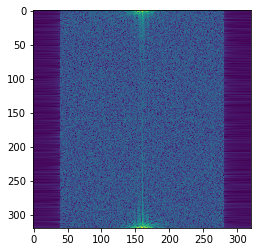

In [47]:
plt.imshow(np.log(1e-2+np.abs(ksp_check_npy)))

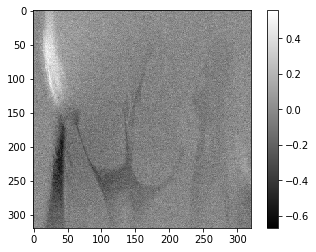

In [42]:
rec = np.fft.ifft2(ksp_shift_npy,norm='ortho')
plt.imshow(np.real(rec),cmap='gray')
plt.colorbar()

In [ ]:
us_image_square_rss = transforms.root_sum_of_squares(inp , dim=1)
us_image_square_rss.shape
plt.imshow(us_image_square_rss[0,:,:],cmap='gray')
plt.colorbar()

In [ ]:
img_stack_1 = inp[:,list(range(0,15,2)),:,:]
img_stack_2 = inp[:,list(range(1,15,2)),:,:]
# img_stack_3 = 
img_stack_3 = (img_stack_1 **2 + img_stack_2 ** 2)
img_stack_4 = torch.sqrt(torch.sum(img_stack_3,dim=1))
img_stack_4.shape

In [ ]:
list(range(1,30,2))

In [ ]:
img_stack_1 = img_stack[:,list(range(0,30,2)),:,:]
img_stack_2 = img_stack[:,list(range(1,30,2)),:,:]
# img_stack_3 = 
img_stack_3 = (img_stack_1 **2 + img_stack_2 ** 2)
img_stack_4 = torch.sqrt(torch.sum(img_stack_3,dim=1))
img_stack_4.shape

In [ ]:
plt.imshow(img_stack_4[2,:,:],cmap='gray')
plt.colorbar()

In [ ]:
img_rss = transforms.root_sum_of_squares(img_stack_rss, dim=0)
print("img_rss",img_rss.shape)
plt.imshow(img_rss,cmap='gray')
plt.colorbar()

In [ ]:
img_stack_cmplx = []
for ctr in range(len(img_stack[0,:,:,:])//2):
    img_stack_cmplx.append(img_stack[0,i,:,:],dim=)

In [ ]:
for _ in range(3):
    item1 = train_loader.dataset[np.random.randint(0,len(train_loader))]

In [ ]:
import glob
import h5py

In [ ]:
aa=pathlib.Path(argsobj.data_path / f'{argsobj.challenge}_train')

In [ ]:
aa.as_posix()

In [ ]:
files = glob.glob(aa.as_posix()+'/*.h5')

In [ ]:
len(files)

In [ ]:
pwd

In [ ]:
import os
os.path.basename(files[ii])[:-2]

In [ ]:
imgs = []
for ii in range(len(files)):
    with h5py.File(files[ii],'r') as h5:
        nslices = h5['kspace'].shape[0]
        img = h5['reconstruction_rss'][nslices//2] * 50
        bn = os.path.basename(files[ii])
        plt.imsave('tmp_%s.png' % bn[:-3], img)

In [ ]:
ksp,ksp_zf, img_stack, inp, tgt = item1

In [ ]:
img_stack.shape


In [ ]:
#checking the zero filled kspace
# zf kspace is stacked as : Real,Imag,Real,Imag.....
ksp_check =[]
ksp_check = torch.stack((ksp_zf[0,real,:,:],ksp_zf[0,imag,:,:]),dim=2)
print(ksp_check.shape)

img_check = (torch.ifft(ksp_check,2,normalized=True))
img_check.shape
img_check_npy =img_check[:,:,0].numpy()+1j*img_check[:,:,1].numpy()
print(img_check_npy.shape)
plt.imshow(np.abs(img_check_npy),cmap='gray')
plt.colorbar()

In [ ]:
#checking for the FSimage stack (for training domain_transform)
fsimg_check =[]
# fsimg_check = 
# fsimg_check.shape
fsimg_check = img_stack[0,real,:,:].numpy() + 1j*img_stack[0,imag,:,:].numpy()
print("fsimg_stack",img_stack.shape)
plt.imshow(np.abs(fsimg_check),cmap='gray')
plt.colorbar()




In [ ]:
# undersampled image for unet 
print(inp.shape)
plt.imshow(inp[0,:,:],cmap='gray')
plt.colorbar()

In [ ]:
# target image
print(tgt.shape)
plt.imshow(tgt[0,:,:],cmap='gray')
plt.colorbar()

# checking model forward 

In [7]:
from models.dautomap.train_domaintransform import build_model

In [ ]:
#model dautomap
# model_dautomap = build_model(argsobj)
# model_dautomap

In [8]:
mdl = build_model(argsobj)
mdl

GeneralisedIFT2Layer(
  (idft1): Conv2d(2, 640, kernel_size=(320, 1), stride=(1, 1), bias=False)
  (idft2): Conv2d(2, 640, kernel_size=(320, 1), stride=(1, 1), bias=False)
)

In [12]:
mdl.idft1.weight.data.shape

torch.Size([640, 2, 320, 1])

In [ ]:
# model domain_transform
# mdl = model_dautomap.domain_transform
# mdl

In [ ]:
output = mdl(ksp.cuda())
output.shape
op_check = output[0,real,:,:].detach().cpu().numpy() + 1j*output[0,imag,:,:].detach().cpu().numpy()
op_check.shape
plt.imshow(np.abs(op_check),cmap='gray')
plt.colorbar()



In [ ]:
from models.dautomap.train_domaintransform import train_epoch
from data.transforms import stack_to_rss

In [ ]:
optimizer = torch.optim.Adam(mdl.parameters(),lr=0.001)
import torch.nn.functional as F
from tqdm import tqdm
v=[]
for epoch in range(500):
    for iter_, data in enumerate(tqdm(train_loader)):
#         if iter_% 10 ==0:
        ksp,ksp_zf,img_stack , inp, tgt = data
    #     print("ksp",ksp.shape,ksp.dtype)
    #     print("img_stack",img_stack.shape)
        output = mdl(ksp.cuda())
        loss = F.mse_loss(output,img_stack.cuda())
        v.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         for iter_, data in enumerate(tqdm(dispay_loader)):
#             mdl.eval()
#             ksp,ksp_zf,img_stack , inp, tgt = data
#             output = mdl(ksp.cuda())
#             output_rss = stack_to_rss(output)

#             dif = (tgt.detach().cpu().numpy() - output_rss.detach().cpu().numpy())


#             for ri in range(4):
#                 disp_r = dif[ri*4]

#                 for ci in range(1,4):

#                     disp_r = np.hstack((disp_r,dif[ri*4+ci]))
#                 plt.figure(figsize=(12,4))
#                 plt.imshow(disp_r)
#                 plt.colorbar()

#             break


In [ ]:
plt.plot(v)

In [ ]:
output = mdl(ksp.cuda())
output.shape
output_rss = stack_to_rss(output)
print(output_rss.shape)
plt.imshow(output_rss[0,:,:].detach().cpu().numpy(),cmap='gray')
plt.colorbar()

In [ ]:
loss.item()

In [ ]:
for iter_, data in enumerate(tqdm(dispay_loader)):
        ksp,ksp_zf,img_stack , inp, tgt = data
        output = mdl(ksp.cuda())
        output_rss = stack_to_rss(output)

        dif = (tgt.detach().cpu().numpy() - output_rss.detach().cpu().numpy())


        for ri in range(4):
            disp_r = dif[ri*4]

            for ci in range(1,4):

                disp_r = np.hstack((disp_r,dif[ri*4+ci]))
            plt.figure(figsize=(12,4))
            plt.imshow(disp_r)
            plt.colorbar()

        break

In [ ]:
optimizer = torch.optim.Adam(mdl.parameters(),lr=0.001)
import torch.nn.functional as F
from tqdm import tqdm
import time

writer = None
v=[]
for epoch in range(500):
#     train_epoch(argsobj, epoch, mdl, train_loader, optimizer, None)
    mdl.train()
    avg_loss = 0.
    start_epoch = start_iter = time.perf_counter()
    global_step = epoch * len(train_loader)
    for iter, data in (enumerate(tqdm(train_loader))):

        stacked_kspace_square, _, stacked_image_square , _,_ = data
        # input = input.unsqueeze(1).to(args.device)
        # target = target.to(args.device)

        output = mdl(stacked_kspace_square.cuda()) #.squeeze(1)
        loss = F.mse_loss(output, stacked_image_square.cuda(),reduction = 'sum')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        avg_loss = 0.99 * avg_loss + 0.01 * loss.item() if iter > 0 else loss.item()
        if writer is not None:
            writer.add_scalar('TrainLoss', loss.item(), global_step + iter)

#         if iter % argsobj.report_interval == 0:
#             logging.info(
#                 f'Epoch = [{epoch:3d}/{args.num_epochs:3d}] '
#                 f'Iter = [{iter:4d}/{len(data_loader):4d}] '
#                 f'Loss = {loss.item():.4g} Avg Loss = {avg_loss:.4g} '
#                 f'Time = {time.perf_counter() - start_iter:.4f}s',
#             )
        start_iter = time.perf_counter()
    
    for iter_, data in enumerate(tqdm(dispay_loader)):
        mdl.eval()
        ksp,ksp_zf,img_stack , inp, tgt = data
        output = mdl(ksp.cuda())
        output_rss = stack_to_rss(output)

        dif = (tgt.detach().cpu().numpy() - output_rss.detach().cpu().numpy())


        for ri in range(4):
            disp_r = dif[ri*4]

            for ci in range(1,4):

                disp_r = np.hstack((disp_r,dif[ri*4+ci]))
            plt.figure(figsize=(12,4))
            plt.imshow(disp_r)
            plt.colorbar()

        break

# #         if iter_% 10 ==0:
#         
#     #     print("ksp",ksp.shape,ksp.dtype)
#     #     print("img_stack",img_stack.shape)
#         output = mdl(ksp.cuda())
#         loss = F.mse_loss(output,img_stack.cuda())
#         v.append(loss.item())

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

    
    

In [ ]:
for iter_, data in enumerate(tqdm(dispay_loader)):
        ksp,ksp_zf,img_stack , inp, tgt = data
        output = mdl(ksp.cuda())
        output_rss = stack_to_rss(output)

        dif = (tgt.detach().cpu().numpy() - output_rss.detach().cpu().numpy())


        for ri in range(4):
            disp_r = dif[ri*4]

            for ci in range(1,4):

                disp_r = np.hstack((disp_r,dif[ri*4+ci]))
            plt.figure(figsize=(12,4))
            plt.imshow(disp_r)
            plt.colorbar()

        break

In [ ]:
output = mdl(ksp.cuda())
output.shape
output_rss = stack_to_rss(output)
output_rss.shape

In [ ]:
plt.imshow(output_rss[0,:,:].detach().cpu().numpy(),cmap='gray')

In [ ]:
np.hstack((np.zeros((0,0)),np.eye(3)))

In [ ]:
for iter_, data in enumerate(tqdm(dispay_loader)):
    ksp,ksp_zf,img_stack , inp, tgt = data
    output = mdl(ksp.cuda())
    output_rss = stack_to_rss(output)
    
    dif = (tgt.detach().cpu().numpy() - output_rss.detach().cpu().numpy())
    
    
    for ri in range(4):
        disp_r = dif[ri*4]

        for ci in range(1,4):
        
            disp_r = np.hstack((disp_r,dif[ri*4+ci]))
        plt.figure(figsize=(12,4))
        plt.imshow(disp_r)
        plt.colorbar()
    
    break

In [ ]:
tgt.shape

In [ ]:
# optimizer = torch.optim.RMSprop(mdl.parameters(),lr=0.001)
# import torch.nn.functional as F
# from tqdm import tqdm
# v=[]

# for _ in tqdm(range(500)):
#     output = mdl(ksp.cuda())
#     loss = F.l1_loss(output,img_stack.cuda())
#     v.append(loss.item())
    
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
# #     loss = F.l1
    
# #     print(output.shape)

In [ ]:
plt.semilogy(v)

In [ ]:
output = mdl(ksp.cuda())
output.shape

In [ ]:
fsimg_check =[]
# fsimg_check = 
# fsimg_check.shape
fsimg_check = output[1,real,:,:].detach().cpu().numpy() + 1j*output[1,imag,:,:].detach().cpu().numpy()
fsimg_check.shape
plt.imshow(np.abs(fsimg_check),cmap='gray')
plt.colorbar()

In [ ]:
fsimg_check =[]
# fsimg_check = 
# fsimg_check.shape
fsimg_check = img_stack[0,real,:,:].detach().cpu().numpy() + 1j*img_stack[0,imag,:,:].detach().cpu().numpy()
fsimg_check.shape
plt.imshow(np.abs(fsimg_check),cmap='gray')
plt.colorbar()

In [ ]:
error_stack = output-img_stack.cuda()
error0 = error_stack[0,real,:,:].detach().cpu().numpy() + 1j*error_stack[0,imag,:,:].detach().cpu().numpy()
print(error0.shape)
plt.imshow(np.abs(error0),cmap='gray')
plt.colorbar()

In [ ]:
model_dautomap.domain_transform = mdl

In [ ]:
model_dautomap = model_dautomap.cuda()
output = model_dautomap(ksp.cuda())
print(output.shape)
plt.imshow(output[0,0,:,:].detach().cpu().numpy(),cmap='gray')
plt.colorbar()

In [ ]:
optimizer = torch.optim.RMSprop(model_dautomap.parameters(),lr=0.001)
import torch.nn.functional as F
from tqdm import tqdm
v=[]

for _ in tqdm(range(500)):
    output = model_dautomap(ksp.cuda())
    loss = F.l1_loss(output,10000*tgt.unsqueeze(1).cuda())
    v.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
model_dautomap = model_dautomap.cuda()
output = model_dautomap(ksp.cuda())
print(output.shape)
plt.imshow(output[0,0,:,:].detach().cpu().numpy(),cmap='gray')
plt.colorbar()